In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import opendatasets as od
import os

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
sns.set_theme(style="darkgrid")

#Downloading the dataset and extracting general information

In [ ]:
url = 'https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish'

In [ ]:
od.download(url, force = True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tfkint
Your Kaggle Key: ··········


100%|██████████| 44.0M/44.0M [00:00<00:00, 61.8MB/s]


In [ ]:
os.listdir('summer-products-and-sales-in-ecommerce-wish')

['summer-products-with-rating-and-performance_2020-08.csv',
 'keywords-niches_2021-04',
 'unique-categories.sorted-by-count.csv',
 'unique-categories.csv',
 'keywords-popular_2021-04']

In [ ]:
data = pd.read_csv('./summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv')

In [ ]:
data['total_sails'] = data['price'] * data['units_sold']
data['count'] = 1

In [ ]:
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month', 'total_sails', 'count'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
data.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [ ]:
num_cols = data.select_dtypes('number').columns.tolist()
categ_cols = data.select_dtypes('object').columns.tolist()

In [ ]:
categ_cols

['title',
 'title_orig',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'urgency_text',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'merchant_profile_picture',
 'product_url',
 'product_picture',
 'product_id',
 'theme',
 'crawl_month']

In [ ]:
num_cols

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture',
 'total_sails',
 'count']

In [ ]:
data[categ_cols].describe().transpose()

,count,unique,top,freq
title,1573,1201,Nouvelle mode d'été femmes robe décontractée c...,24
title_orig,1573,1203,New Fashion Summer Women Casual Dress Round Ne...,24
currency_buyer,1573,1,EUR,1573
tags,1573,1230,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",17
product_color,1532,101,black,302
product_variation_size_id,1559,106,S,641
shipping_option_name,1573,15,Livraison standard,1508
urgency_text,473,2,Quantité limitée !,472
origin_country,1556,6,CN,1516
merchant_title,1573,958,guangzhouweishiweifushiyouxiangongsi,15


#Studying the color column

In [ ]:
data['product_color'] = data['product_color'].str.lower()

In [ ]:
colors = data['product_color'].unique().tolist()
len(colors)

96

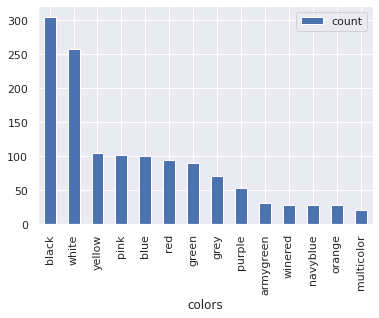

In [ ]:
# use value_coult() to create df with colors and their count
color_count = pd.DataFrame(data['product_color'].value_counts())
color_count.reset_index(inplace=True)
# rename the columns and plot the colors that appear more than 20 times
color_count.columns=['colors','count']
color_count[color_count['count']>=20].plot(kind='bar', x='colors')

Looks like the colors Black and white are the most common ones between 300 and 200 articles 
Other normal colors like yellow blue red ... are between 100 and 50.

#Studying the tag column.

##Creating the Dataframe we need to study the tags and their relationship with the sails.

In [ ]:
data['tags'].describe()

count                                                  1573
unique                                                 1230
top       Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...
freq                                                     17
Name: tags, dtype: object

In [ ]:
tags_df = data.loc[:,['title', 'tags']]

In [ ]:
tag_df = data.loc[:,['title', 'tags']]

In [ ]:
# Splitting the tags column into individual tags and renaming the columns 
Tags = tag_df['tags'].str.split(',', expand=True).fillna('')
Tags.columns = [f'tag_{x}' for x in Tags.columns]

In [ ]:
# Merge the new Df with the old one to get the name of the products in the same rows as their tags
tag_df = tag_df.merge(Tags, left_index=True, right_index=True)
tag_df.drop(columns='tags', inplace=True)

In [ ]:
# Adding the Price, Units_sold and total_sails columns to the Df
tag_df = tag_df.merge(data[['price', 'units_sold','total_sails']], right_index=True, left_index=True)

In [ ]:
# Check if the new Df matches the original one
Check = tag_df[['title', 'price', 'units_sold','total_sails']] == data[['title', 'price', 'units_sold','total_sails']]
Check.sum()

title          1573
price          1573
units_sold     1573
total_sails    1573
dtype: int64

The Dataframe now is a mess. 
We need to set the tags as the column's named and replace the data with 1 and 0 depending on whether the product has the tag or not.

In [ ]:
# Turning the df to a list to extract all the tags and flattening the array to 1D
Tag_list = tag_df[[f'tag_{x}' for x in range(41)]].to_numpy().reshape(-1).tolist()
# Removing all empty strings
Tag_list = [str for str in Tag_list if str !='']
Tag_list = [str for str in Tag_list if str !='t']
# Removing duplicates 
Tag_list = list(dict.fromkeys(Tag_list))
len(Tag_list)

2619

In [ ]:
# Creating tag columns with 1 and 0 for the data depends if the product has the tag

for tag in Tag_list :    
    tags_df[tag] = np.where(tags_df.loc[:,'tags'].str.contains(tag),1,0)

tags_df.drop(columns=['tags'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [ ]:
tag_count = pd.DataFrame(tags_df.iloc[:,1:2619].sum())

In [ ]:
# Adding the Price, Units_sold and total_sails columns to the Df
tags_df = tags_df.merge(data[['price', 'units_sold','total_sails']], right_index=True, left_index=True)
# Check if the new Df matches the original one
Check = tags_df[['title', 'price', 'units_sold','total_sails']] == data[['title', 'price', 'units_sold','total_sails']]
Check.sum()

title          1573
price          1573
units_sold     1573
total_sails    1573
dtype: int64

In [ ]:

# Create a Df of the sum of 'price' , 'unit_sold' and 'total_sails' by tag from a dictionary.
Dict = dict.fromkeys(Tag_list)

for col in Tag_list:
    Dict[col] = [tags_df.loc[tags_df[col] == 1, 'price'].sum(),
                 tags_df.loc[tags_df[col] == 1, 'units_sold'].sum(),
                 tags_df.loc[tags_df[col] == 1, 'total_sails'].sum()]


Dicts = pd.DataFrame.from_dict(Dict, orient='index', columns=['price', 'units_sold','total_sails'])

In [ ]:
# Add the tag count to the last Df

Dicts = Dicts.merge(tag_count, right_index=True, left_index=True)
Dicts.reset_index(inplace=True)
Dicts.rename(columns={'index':'tag', 0:'count'}, inplace=True)

In [ ]:

# Create the mean by count for each tag

Dicts['M_price'] =  Dicts['price'] / Dicts['count']
Dicts['M_units_sold'] =  Dicts['units_sold'] / Dicts['count']
Dicts['M_total_sailes'] =  Dicts['total_sails'] / Dicts['count']

In [ ]:
# We are only going to look at tags used more than 100 times
Dicts = Dicts.loc[Dicts['count']>100,:]
Dicts.head(5)

,tag,price,units_sold,total_sails,count,M_price,M_units_sold,M_total_sailes
0,Summer,"10,909.4900",4466675,"35,572,292.1500",1331,8.1965,"3,355.8790","26,725.9896"
1,Fashion,"12,396.4200",6611343,"53,693,914.1500",1495,8.2919,"4,422.3030","35,915.6616"
5,Women's Fashion,"10,801.1900",5949853,"48,284,806.8500",1316,8.2076,"4,521.1649","36,690.5827"
8,Casual,"7,303.1700",3648268,"28,126,690.8500",934,7.8192,"3,906.0685","30,114.2300"
9,Shirt,"3,231.9100",2091537,"14,994,731.2200",417,7.7504,"5,015.6763","35,958.5881"


##Now that we have our Df we can start analyzing the data

In [ ]:
Dicts.describe().transpose().loc[:,['mean','std','min','max']]

,mean,std,min,max
price,"2,779.7328","2,696.9138",794.5000,"12,396.4200"
units_sold,"1,498,508.0345","1,433,698.4495","313,810.0000","6,611,343.0000"
total_sails,"11,941,347.2890","11,407,027.0660","2,458,791.8300","53,693,914.1500"
count,338.6897,330.3968,101.0000,"1,495.0000"
M_price,8.3096,0.7467,6.6655,10.0001
M_units_sold,"4,497.5357","1,173.5316","2,640.0397","7,356.0881"
M_total_sailes,"36,348.5450","9,768.1131","19,514.2209","58,966.3168"


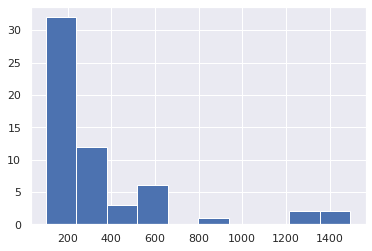

In [ ]:
Dicts['count'].hist()

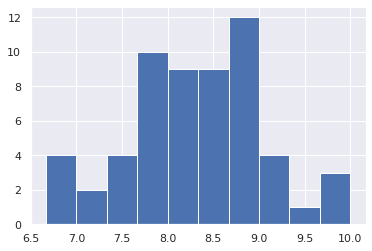

In [ ]:
Dicts['M_price'].hist()

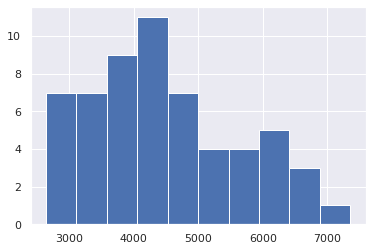

In [ ]:
Dicts['M_units_sold'].hist()

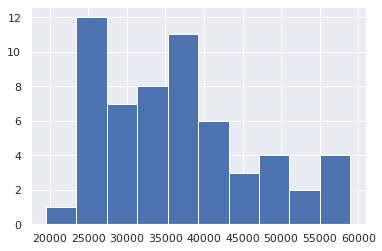

In [ ]:
Dicts['M_total_sailes'].hist()

From the 1st look  we can see that :
* The mean prices by count are normally distributed around 9€
*
The total sails and unit soled mean by count are rightly skewed.

This difference is due to the use of certain tags exponentially more than others

##In this next section we going to look at how tags are used together and try to find any sort of relationships or regulations

In [ ]:
Tag_C = tags_df.loc[:,list(Dicts.tag)]
Tag_C.shape

(1573, 58)

In [ ]:
# Define a custom function that counts how many times each pair of tags has been used together and returns a dictionary 

def asso_count(df, tag_1, tag_2):
    return df.loc[df[tag_1] == 1, tag_2].sum()

In [ ]:
D = pd.DataFrame(index=list(Tag_C), columns=list(Tag_C))

In [ ]:
for i in D.index:
    for c in D.columns:
        D.loc[i, c] = asso_count(Tag_C, i, c)

In [ ]:
D = D.astype('int32')

In [ ]:
D.head(4)

,Summer,Fashion,Women's Fashion,Casual,Shirt,Shorts,Tops,Women,Print,Mini,...,high waist,Waist,Sport,boho,art,wear,sleevele,Cloth,long,sleeves
Summer,1331,1272,1118,854,366,481,451,1166,283,177,...,83,112,105,73,184,126,535,92,138,275
Fashion,1272,1495,1316,910,409,510,525,1363,318,202,...,101,129,110,99,213,182,582,100,164,286
Women's Fashion,1118,1316,1316,830,355,431,447,1316,290,185,...,94,112,78,97,209,146,543,86,162,247
Casual,854,910,830,934,312,360,374,859,208,120,...,57,75,73,36,118,53,455,55,80,208


In [ ]:
# Test to see if some tags are not used together
D.all()

Summer               True
Fashion              True
Women's Fashion      True
Casual               True
Shirt               False
Shorts               True
Tops                 True
Women                True
Print                True
Mini                False
Dress                True
Mini dress          False
backless            False
party               False
sleeveless           True
sexy                 True
short sleeves       False
printed              True
Beach                True
Cotton               True
Sleeve               True
Necks                True
T Shirts            False
Plus Size            True
Lace                 True
pants               False
Loose               False
blouse              False
summer dress        False
slim                 True
Floral print         True
Floral               True
long dress          False
beach dress         False
Sleeveless dress    False
women dress         False
V-neck              False
Vest                False
tank top    

In [ ]:
# These are the tags that are always used together and are the most used
G=list(D[D.all() == True].index)
G

['Summer',
 'Fashion',
 "Women's Fashion",
 'Casual',
 'Shorts',
 'Tops',
 'Women',
 'Print',
 'Dress',
 'sleeveless',
 'sexy',
 'printed',
 'Beach',
 'Cotton',
 'Sleeve',
 'Necks',
 'Plus Size',
 'Lace',
 'slim',
 'Floral print',
 'Floral',
 'Women Fashion',
 'Tank',
 'Ladies',
 'sleevele']

In [ ]:
# These are the tags that are not always used together and are the most used
T=list(D[D.all() != True].index)
T

['Shirt',
 'Mini',
 'Mini dress',
 'backless',
 'party',
 'short sleeves',
 'T Shirts',
 'pants',
 'Loose',
 'blouse',
 'summer dress',
 'long dress',
 'beach dress',
 'Sleeveless dress',
 'women dress',
 'V-neck',
 'Vest',
 'tank top',
 'Spaghetti',
 'Dresses',
 'Party Dress',
 'casual dress',
 'Slim Fit',
 'Round neck',
 'high waist',
 'Waist',
 'Sport',
 'boho',
 'art',
 'wear',
 'Cloth',
 'long',
 'sleeves']

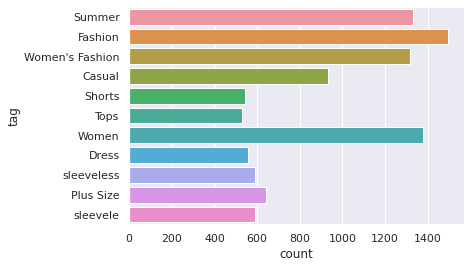

In [ ]:
# Tags used more than 500 times and their counts.

sns.barplot(y=Dicts.loc[Dicts['count']>500,'tag'],
            x=Dicts.loc[Dicts['count']>500,'count'])

Looking at the tags used we can't find any significant patterns.
What we can see in the data is that :
* Some tags are used significantly more than others, the most used are 'Summer' 1331 times, 'Fasion' 1495 times and 'women' 1379 times.

For deeper analysis using machine learning or deep learning we can think of removing some tags and only using the most common ones.

# Studying the shipped to country column.

In [ ]:
coli = ['title', 'countries_shipped_to']
F = pd.DataFrame(data.loc[:,coli])
F.head(4)

,title,countries_shipped_to
0,2020 Summer Vintage Flamingo Print Pajamas Se...,34
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,41
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,36
3,Hot Summer Cool T-shirt pour les femmes Mode T...,41


In [ ]:
F = F.groupby('title', as_index=False).sum()
F.head(4)

,title,countries_shipped_to
0,Nouveau The New Men ' s Stitching Design Pant...,36
1,Pantalon dos nu à rayures et jambes larges po...,36
2,Pantalon à bretelles 3 couleurs Nouvelle mode...,40
3,Plus Taille S-5XL Femmes T-shirts d'été à man...,48


In [ ]:
F.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
countries_shipped_to,"1,201.0000",52.9875,50.0661,6.0000,35.0000,41.0000,51.0000,946.0000


In [ ]:
# The most shipped product.
MostShipped = str(F.loc[F['countries_shipped_to']==F['countries_shipped_to'].max(),:].values)
MostShipped

'[["Nouvelle mode d\'été femmes robe décontractée col rond lâche Big Swing jupe sans manches Soild couleur robe de plage"\n  946]]'

In [ ]:
# Sails by country of origin.
data.loc[:,['origin_country','total_sails','units_sold']].groupby('origin_country').sum()

,total_sails,units_sold
origin_country,,
AT,700.0000,100
CN,"54,115,270.6500",6651245
GB,"9,000.0000",1000
SG,"56,993.0000",20100
US,"432,422.0000",43560
VE,"3,424.5000",350


Most products on this website are from China that's why it has the most sails.

# Is the length of the titles significant ?

In [ ]:
Long_name = data.loc[:,['title' ,*num_cols]]
Long_name['length'] = Long_name['title'].apply(len)
Long_name.head(4)

,title,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,total_sails,count,length
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0000,14,100,0,3.7600,54,26.0000,8.0000,10.0000,...,0,34,50,1.0000,568,4.1285,0,"1,600.0000",1,134
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0000,22,20000,1,3.4500,6135,"2,269.0000","1,027.0000","1,118.0000",...,0,41,50,1.0000,17752,3.8997,0,"160,000.0000",1,126
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,8.0000,43,100,0,3.5700,14,5.0000,4.0000,2.0000,...,0,36,50,1.0000,295,3.9898,0,800.0000,1,158
3,Hot Summer Cool T-shirt pour les femmes Mode T...,8.0000,8,5000,1,4.0300,579,295.0000,119.0000,87.0000,...,0,41,50,NaN,23832,4.0204,0,"40,000.0000",1,132


In [ ]:
# Slice the data based on the length column 

Sails_by_namelength = Long_name.groupby(pd.cut(Long_name['length'],[0,50,100,150,200,250,300,float('inf')])).sum()
Sails_by_namelength.drop(columns='length', inplace=True)
Sails_by_namelength.reset_index(inplace=True)
Sails_by_namelength

,length,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,total_sails,count
0,"(0.0, 50.0]",163.6900,385,74256,6,73.2500,14523,"7,592.0000","2,866.0000","2,031.0000",...,48,0,636,950,6.0000,618761,77.3099,2,"601,686.0000",19
1,"(50.0, 100.0]","4,915.6300",14870,2473168,243,"2,172.5400",530686,"247,157.0000","105,642.0000","80,799.0000",...,1365,2,22913,28191,183.0000,20704400,"2,282.5535",72,"20,402,385.0300",566
2,"(100.0, 150.0]","6,103.9200",15691,2946991,333,"2,823.1100",602874,"292,408.0000","118,022.0000","88,344.0000",...,1739,2,29910,37027,226.0000,16542117,"2,990.3769",120,"24,754,672.7200",743
3,"(150.0, 200.0]","1,577.9700",5091,926340,88,767.9300,179334,"91,709.0000","34,392.0000","24,563.0000",...,443,0,8663,9951,51.0000,2789519,809.8736,28,"6,939,163.4000",200
4,"(200.0, 250.0]",228.3100,494,194500,9,117.9400,31077,"15,699.0000","5,720.0000","4,265.0000",...,63,0,1184,1550,3.0000,803264,125.4820,3,"1,126,389.0000",31
5,"(250.0, 300.0]",72.2900,67,155000,2,39.5000,31196,"16,455.0000","5,963.0000","4,169.0000",...,22,0,249,500,3.0000,183785,40.8189,1,"1,108,350.0000",10
6,"(300.0, inf]",34.0000,35,55000,0,16.0000,9744,"4,759.0000","1,823.0000","1,421.0000",...,9,0,83,200,1.0000,36099,16.4640,0,"455,000.0000",4


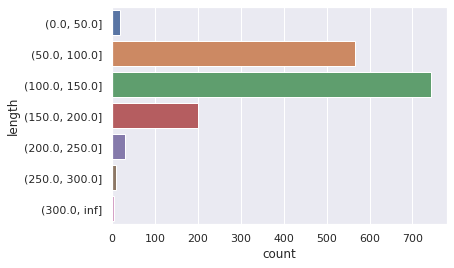

In [ ]:
sns.barplot(data=Sails_by_namelength,
            x=Sails_by_namelength['count'],
            y=Sails_by_namelength['length'])

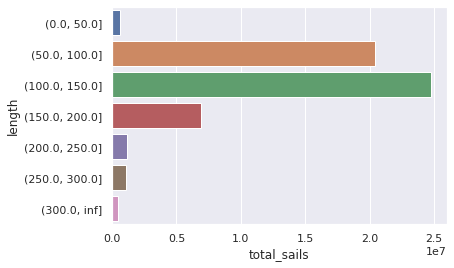

In [ ]:
sns.barplot(data=Sails_by_namelength,
            x=Sails_by_namelength['total_sails'],
            y=Sails_by_namelength['length'])

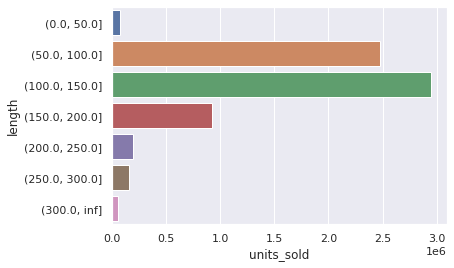

In [ ]:
sns.barplot(data=Sails_by_namelength,
            x=Sails_by_namelength['units_sold'],
            y=Sails_by_namelength['length'])

In [ ]:
name50_to_150 = Long_name.loc[(Long_name['length'] > 50) & (Long_name['length'] < 150),'count'].sum()/Long_name['count'].sum()
name50_to_150

0.8289891926255563

Most product's titles have characters between 50 and 150 more than 80%.
Therefore we cannot deduce a significant relationship between number of characters and sails.

# What are the top 10 merchant doing different ?

In [ ]:
data['tag_len'] = data.loc[:,'tags'].apply(len)

In [ ]:
data['merchant_title'].describe()

count                                     1573
unique                                     958
top       guangzhouweishiweifushiyouxiangongsi
freq                                        15
Name: merchant_title, dtype: object

In [ ]:
Test_df = data.groupby(data['merchant_title'],as_index=False).sum()

In [ ]:
Test_df[['merchant_title','units_sold','total_sails']]

,merchant_title,units_sold,total_sails
0,007 Fashion,10000,"60,000.0000"
1,008fashion,10000,"40,000.0000"
2,10 days delivery,20,140.0000
3,19 Miles,100,"1,200.0000"
4,211670008@qq.com,41000,"263,000.0000"
...,...,...,...
953,zoufei,200,788.0000
954,zoushoujintmiao,2000,"11,740.0000"
955,zufanqiudinli,50,250.0000
956,zuilangmanDS,2400,"4,842.0000"


In [ ]:
Test_df['total_sails'].describe()

count         958.0000
mean       57,815.9146
std       114,583.2897
min             2.7200
25%         1,200.0000
50%        11,000.0000
75%        64,500.0000
max     1,055,000.0000
Name: total_sails, dtype: float64

In [ ]:
top_10 = Test_df.iloc[Test_df['total_sails'].nlargest(n=10).index,:]

In [ ]:
bottom_10 = Test_df.iloc[Test_df['total_sails'].nsmallest(n=10).index,:]

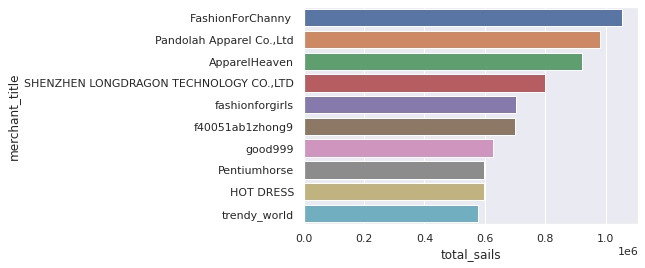

In [ ]:
sns.barplot(data=top_10,
            x=top_10['total_sails'],
            y=top_10['merchant_title'])

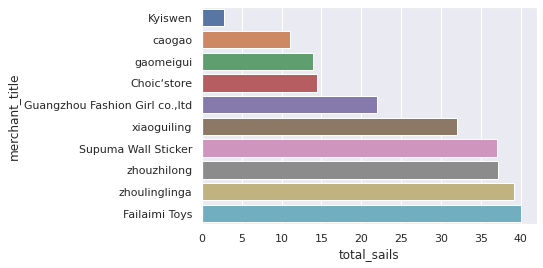

In [ ]:
sns.barplot(data=bottom_10,
            x=bottom_10['total_sails'],
            y=bottom_10['merchant_title'])

In [ ]:
# Number of products by merchant of the top 10 merchant sell
M_top_prod = top_10.loc[:,'count'].sum()/10
M_top_prod

3.4

In [ ]:
# Number of products by merchant of the bottom 10 merchant sell
M_bottom_prod = bottom_10.loc[:,'count'].sum()/10
M_bottom_prod

1.1


* On average the top_10 merchant sell 3 products, the bottom_10 only sell one product on average.
* On average the top_10 merchant use 20 more tags on their products than the bottom_10 merchant.

In [ ]:
# Number of tags used by product by the top 10.
top_10['tag_len'].sum()/top_10['count'].sum()

168.52941176470588

In [ ]:
# Number of tags used by product by the bottom 10
bottom_10['tag_len'].sum()/bottom_10['count'].sum()

148.0909090909091

In [ ]:
top_10['rating_count'].sum()/10

15012.9

In [ ]:
bottom_10['rating_count'].sum()/10

1.7

In [ ]:
top_10['units_sold'].sum()

823207

In [ ]:
bottom_10['units_sold'].sum()

60

In [ ]:
price_by_top_M = (top_10['price']/top_10['count']).sum()/10
retail_price_by_top_M = (top_10['retail_price']/top_10['count']).sum()/10
print(f'The average price on the website is {int(price_by_top_M)}\nand the average retail price on the market is {int(retail_price_by_top_M)}\na difference of 28')

The average price on the website is 10
and the average retail price on the market is 38
a difference of 28


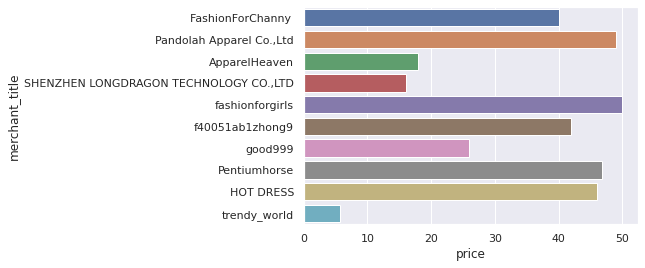

In [ ]:
sns.barplot(data=top_10,
            x='price',
            y='merchant_title')

In [ ]:
price_by_bottom_M = (bottom_10['price']/bottom_10['count']).sum()/10
retail_price_by_bottom_M = (bottom_10['retail_price']/bottom_10['count']).sum()/10
print(f'The average price on the website is {int(price_by_bottom_M)}\nand the average retail price on the market is {int(retail_price_by_bottom_M)}\na difference of 6')

The average price on the website is 7
and the average retail price on the market is 13
a difference of 6


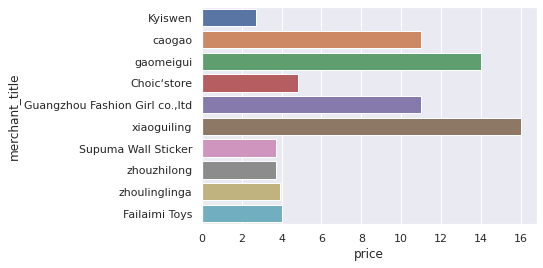

In [ ]:
sns.barplot(data=bottom_10,
            x='price',
            y='merchant_title')

* The top 10 merchant sell on average expensive products on the market at lower prices. On average customers make 28 of profit buying from this website.

* The bottom 10 sell cheap products on the market with somewhat regular prices. On average the customers only make 7 of profit.

In [ ]:
num_cols

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture',
 'total_sails',
 'count']

In [ ]:
top_10['merchant_rating'] = top_10['merchant_rating']/top_10['count']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bottom_10['merchant_rating'] = bottom_10['merchant_rating']/bottom_10['count']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
top_10['merchant_rating'].mean()

4.136243068287995

In [ ]:
bottom_10['merchant_rating'].mean()

3.9005774658337757

In [ ]:
bottom_10['merchant_rating'].std()

0.2581181515830319

In [ ]:
top_10['merchant_rating'].std()

0.13134987778528326

* The top 10 merchants have on avrage a high rating of 4.13 with a low standard diviation.
* The bottom 10 merchants have also on average a high rating of 3.90 with a high standard deviation.